In [17]:
import keras
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot

In [12]:
!pip install -U scikit-learn


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [13]:
import glob

In [14]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

11501568/11490434 [==============================] - 2s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


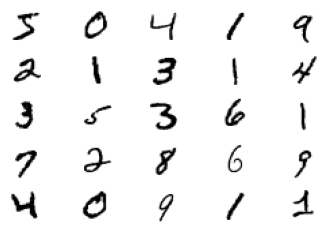

In [18]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [22]:
# example of training the discriminator model on real and random mnist images
from numpy import expand_dims
import tensorflow as tf
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y
 
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
 


In [23]:
#define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

C:\Users\z004hzff\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>1 real=57% fake=37%
>2 real=62% fake=55%
>3 real=73% fake=80%
>4 real=66% fake=89%
>5 real=69% fake=98%
>6 real=67% fake=98%
>7 real=73% fake=100%
>8 real=60% fake=100%
>9 real=65% fake=100%
>10 real=74% fake=100%
>11 real=70% fake=100%
>12 real=73% fake=100%
>13 real=72% fake=100%
>14 real=82% fake=100%
>15 real=74% fake=100%
>16 real=81% fake=100%
>17 real=78% fake=100%
>18 real=85% fake=100%
>19 real=80% fake=100%
>20 real=79% fake=100%
>21 real=81% fake=100%
>22 real=87% fake=100%
>23 real=89% fake=100%
>24 real=92% fake=100%
>25 real=96% fake=100%
>26 real=94% fake=100%
>27 real=95% fake=100%
>28 real=98% fake=100%
>29 real=96% fake=100%
>30 real=98% fake=100%
>31 real=99% fake=100%
>32 real=98% fake=100%
>33 real=99% fake=100%
>34 real=99% fake=100%
>35 real=100% fake=100%
>36 real=99% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=99% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

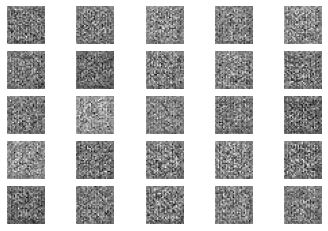

In [26]:
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()


In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [30]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [31]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))


In [32]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [ ]:

# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()
 
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/234, d=0.680, g=0.765
>1, 2/234, d=0.674, g=0.785
>1, 3/234, d=0.663, g=0.806
>1, 4/234, d=0.654, g=0.819
>1, 5/234, d=0.650, g=0.844
>1, 6/234, d=0.640, g=0.853
>1, 7/234, d=0.637, g=0.869
>1, 8/234, d=0.633, g=0.867
>1, 9/234, d=0.634, g=0.867
>1, 10/234, d=0.636, g=0.847
>1, 11/234, d=0.641, g=0.824
>1, 12/234, d=0.646, g=0.796
>1, 13/234, d=0.654, g=0.772
>1, 14/234, d=0.653, g=0.750
>1, 15/234, d=0.653, g=0.733
>1, 16/234, d=0.654, g=0.723
>1, 17/234, d=0.649, g=0.715
>1, 18/234, d=0.643, g=0.709
>1, 19/234, d=0.639, g=0.706
>1, 20/234, d=0.633, g=0.703
>1, 21/234, d=0.627, g=0.701
>1, 22/234, d=0.617, g=0.700
>1, 23/234, d=0.609, g=0.700
>1, 24/234, d=0.597, g=0.699
>1, 25/234, d=0.594, g=0.699
>1, 26/234, d=0.584, g=0.700
>1, 27/234, d=0.578, g=0.700
>1, 28/234, d=0.565, g=0.701
>1, 29/234, d=0.556, g=0.701
>1, 30/234, d=0.550, g=0.702
>1, 31/234, d=0.530, g=0.703
>1, 32/234, d=0.528, g=0.704
>1, 33/234, d=0.516, g=0.705
>1, 34/234, d=0.505, g=0.707
>1, 35/234, d=0.496, g=

>2, 46/234, d=0.053, g=2.828
>2, 47/234, d=0.060, g=2.867
>2, 48/234, d=0.049, g=2.877
>2, 49/234, d=0.052, g=2.916
>2, 50/234, d=0.052, g=2.943
>2, 51/234, d=0.048, g=2.938
>2, 52/234, d=0.054, g=2.984
>2, 53/234, d=0.037, g=2.998
>2, 54/234, d=0.047, g=3.024
>2, 55/234, d=0.050, g=3.064
>2, 56/234, d=0.048, g=3.086
>2, 57/234, d=0.055, g=3.071
>2, 58/234, d=0.046, g=3.087
>2, 59/234, d=0.047, g=3.108
>2, 60/234, d=0.046, g=3.115
>2, 61/234, d=0.040, g=3.146
>2, 62/234, d=0.040, g=3.133
>2, 63/234, d=0.045, g=3.128
>2, 64/234, d=0.040, g=3.131
>2, 65/234, d=0.042, g=3.194
>2, 66/234, d=0.039, g=3.179
>2, 67/234, d=0.043, g=3.175
>2, 68/234, d=0.034, g=3.215
>2, 69/234, d=0.040, g=3.212
>2, 70/234, d=0.038, g=3.220
>2, 71/234, d=0.039, g=3.263
>2, 72/234, d=0.037, g=3.190
>2, 73/234, d=0.044, g=3.167
>2, 74/234, d=0.055, g=3.170
>2, 75/234, d=0.082, g=2.975
>2, 76/234, d=0.225, g=2.251
>2, 77/234, d=4.801, g=0.001
>2, 78/234, d=4.937, g=0.001
>2, 79/234, d=3.754, g=0.016
>2, 80/234, d=

>3, 91/234, d=0.739, g=0.698
>3, 92/234, d=0.739, g=0.679
>3, 93/234, d=0.757, g=0.668
>3, 94/234, d=0.743, g=0.684
>3, 95/234, d=0.733, g=0.646
>3, 96/234, d=0.759, g=0.661
>3, 97/234, d=0.750, g=0.662
>3, 98/234, d=0.728, g=0.669
>3, 99/234, d=0.760, g=0.651
>3, 100/234, d=0.738, g=0.658
>3, 101/234, d=0.739, g=0.638
>3, 102/234, d=0.754, g=0.629
>3, 103/234, d=0.771, g=0.636
>3, 104/234, d=0.745, g=0.631
>3, 105/234, d=0.754, g=0.638
>3, 106/234, d=0.758, g=0.636
>3, 107/234, d=0.753, g=0.631
>3, 108/234, d=0.742, g=0.630
>3, 109/234, d=0.739, g=0.635
>3, 110/234, d=0.754, g=0.623
>3, 111/234, d=0.732, g=0.630
>3, 112/234, d=0.754, g=0.635
>3, 113/234, d=0.754, g=0.638
>3, 114/234, d=0.750, g=0.656
>3, 115/234, d=0.767, g=0.642
>3, 116/234, d=0.746, g=0.656
>3, 117/234, d=0.758, g=0.643
>3, 118/234, d=0.757, g=0.627
>3, 119/234, d=0.746, g=0.642
>3, 120/234, d=0.756, g=0.641
>3, 121/234, d=0.737, g=0.618
>3, 122/234, d=0.747, g=0.645
>3, 123/234, d=0.744, g=0.627
>3, 124/234, d=0.75

>4, 134/234, d=0.688, g=0.708
>4, 135/234, d=0.690, g=0.726
>4, 136/234, d=0.706, g=0.719
>4, 137/234, d=0.690, g=0.730
>4, 138/234, d=0.688, g=0.731
>4, 139/234, d=0.691, g=0.736
>4, 140/234, d=0.679, g=0.743
>4, 141/234, d=0.669, g=0.746
>4, 142/234, d=0.680, g=0.751
>4, 143/234, d=0.677, g=0.761
>4, 144/234, d=0.663, g=0.763
>4, 145/234, d=0.676, g=0.768
>4, 146/234, d=0.659, g=0.778
>4, 147/234, d=0.675, g=0.756
>4, 148/234, d=0.670, g=0.756
>4, 149/234, d=0.669, g=0.775
>4, 150/234, d=0.666, g=0.786
>4, 151/234, d=0.665, g=0.783
>4, 152/234, d=0.659, g=0.776
>4, 153/234, d=0.657, g=0.778
>4, 154/234, d=0.663, g=0.783
>4, 155/234, d=0.660, g=0.775
>4, 156/234, d=0.656, g=0.777
>4, 157/234, d=0.667, g=0.756
>4, 158/234, d=0.658, g=0.757
>4, 159/234, d=0.666, g=0.749
>4, 160/234, d=0.672, g=0.735
>4, 161/234, d=0.653, g=0.737
>4, 162/234, d=0.666, g=0.733
>4, 163/234, d=0.674, g=0.737
>4, 164/234, d=0.665, g=0.741
>4, 165/234, d=0.662, g=0.734
>4, 166/234, d=0.671, g=0.725
>4, 167/23

>5, 177/234, d=0.672, g=0.738
>5, 178/234, d=0.672, g=0.739
>5, 179/234, d=0.679, g=0.725
>5, 180/234, d=0.674, g=0.718
>5, 181/234, d=0.676, g=0.712
>5, 182/234, d=0.677, g=0.707
>5, 183/234, d=0.677, g=0.699
>5, 184/234, d=0.673, g=0.700
>5, 185/234, d=0.677, g=0.709
>5, 186/234, d=0.682, g=0.720
>5, 187/234, d=0.674, g=0.728
>5, 188/234, d=0.683, g=0.737
>5, 189/234, d=0.677, g=0.725
>5, 190/234, d=0.677, g=0.725
>5, 191/234, d=0.676, g=0.728
>5, 192/234, d=0.670, g=0.730
>5, 193/234, d=0.689, g=0.739
>5, 194/234, d=0.677, g=0.738
>5, 195/234, d=0.675, g=0.713
>5, 196/234, d=0.672, g=0.709
>5, 197/234, d=0.688, g=0.712
>5, 198/234, d=0.683, g=0.697
>5, 199/234, d=0.687, g=0.692
>5, 200/234, d=0.672, g=0.694
>5, 201/234, d=0.686, g=0.694
>5, 202/234, d=0.685, g=0.706
>5, 203/234, d=0.686, g=0.720
>5, 204/234, d=0.684, g=0.717
>5, 205/234, d=0.688, g=0.732
>5, 206/234, d=0.689, g=0.722
>5, 207/234, d=0.684, g=0.716
>5, 208/234, d=0.680, g=0.726
>5, 209/234, d=0.683, g=0.727
>5, 210/23

>6, 220/234, d=0.696, g=0.700
>6, 221/234, d=0.683, g=0.742
>6, 222/234, d=0.686, g=0.785
>6, 223/234, d=0.679, g=0.799
>6, 224/234, d=0.685, g=0.795
>6, 225/234, d=0.696, g=0.766
>6, 226/234, d=0.693, g=0.731
>6, 227/234, d=0.689, g=0.701
>6, 228/234, d=0.680, g=0.676
>6, 229/234, d=0.681, g=0.672
>6, 230/234, d=0.693, g=0.654
>6, 231/234, d=0.686, g=0.649
>6, 232/234, d=0.689, g=0.646
>6, 233/234, d=0.688, g=0.658
>6, 234/234, d=0.696, g=0.683
>7, 1/234, d=0.695, g=0.720
>7, 2/234, d=0.692, g=0.765
>7, 3/234, d=0.689, g=0.785
>7, 4/234, d=0.695, g=0.786
>7, 5/234, d=0.692, g=0.786
>7, 6/234, d=0.698, g=0.766
>7, 7/234, d=0.692, g=0.732
>7, 8/234, d=0.697, g=0.700
>7, 9/234, d=0.697, g=0.689
>7, 10/234, d=0.693, g=0.677
>7, 11/234, d=0.697, g=0.670
>7, 12/234, d=0.693, g=0.657
>7, 13/234, d=0.687, g=0.642
>7, 14/234, d=0.693, g=0.659
>7, 15/234, d=0.702, g=0.671
>7, 16/234, d=0.690, g=0.711
>7, 17/234, d=0.696, g=0.738
>7, 18/234, d=0.685, g=0.780
>7, 19/234, d=0.699, g=0.771
>7, 20/2

>8, 30/234, d=0.689, g=0.713
>8, 31/234, d=0.686, g=0.740
>8, 32/234, d=0.693, g=0.753
>8, 33/234, d=0.690, g=0.765
>8, 34/234, d=0.689, g=0.756
>8, 35/234, d=0.690, g=0.741
>8, 36/234, d=0.690, g=0.730
>8, 37/234, d=0.690, g=0.720
>8, 38/234, d=0.687, g=0.709
>8, 39/234, d=0.686, g=0.697
>8, 40/234, d=0.693, g=0.682
>8, 41/234, d=0.690, g=0.678
>8, 42/234, d=0.685, g=0.671
>8, 43/234, d=0.695, g=0.673
>8, 44/234, d=0.692, g=0.681
>8, 45/234, d=0.688, g=0.692
>8, 46/234, d=0.697, g=0.701
>8, 47/234, d=0.693, g=0.721
>8, 48/234, d=0.688, g=0.742
>8, 49/234, d=0.688, g=0.752
>8, 50/234, d=0.692, g=0.757
>8, 51/234, d=0.692, g=0.754
>8, 52/234, d=0.694, g=0.745
>8, 53/234, d=0.694, g=0.725
>8, 54/234, d=0.694, g=0.723
>8, 55/234, d=0.693, g=0.704
>8, 56/234, d=0.690, g=0.695
>8, 57/234, d=0.689, g=0.684
>8, 58/234, d=0.678, g=0.679
>8, 59/234, d=0.689, g=0.676
>8, 60/234, d=0.687, g=0.688
>8, 61/234, d=0.687, g=0.691
>8, 62/234, d=0.684, g=0.706
>8, 63/234, d=0.685, g=0.732
>8, 64/234, d=

>9, 75/234, d=0.687, g=0.718
>9, 76/234, d=0.692, g=0.711
>9, 77/234, d=0.698, g=0.705
>9, 78/234, d=0.697, g=0.714
>9, 79/234, d=0.694, g=0.718
>9, 80/234, d=0.684, g=0.722
>9, 81/234, d=0.697, g=0.706
>9, 82/234, d=0.683, g=0.706
>9, 83/234, d=0.692, g=0.702
>9, 84/234, d=0.683, g=0.699
>9, 85/234, d=0.677, g=0.701
>9, 86/234, d=0.693, g=0.708
>9, 87/234, d=0.691, g=0.710
>9, 88/234, d=0.681, g=0.718
>9, 89/234, d=0.683, g=0.729
>9, 90/234, d=0.680, g=0.731
>9, 91/234, d=0.680, g=0.737
>9, 92/234, d=0.681, g=0.743
>9, 93/234, d=0.681, g=0.748
>9, 94/234, d=0.687, g=0.747
>9, 95/234, d=0.681, g=0.723
>9, 96/234, d=0.674, g=0.709
>9, 97/234, d=0.670, g=0.700
>9, 98/234, d=0.678, g=0.693
>9, 99/234, d=0.675, g=0.697
>9, 100/234, d=0.670, g=0.695
>9, 101/234, d=0.673, g=0.711
>9, 102/234, d=0.667, g=0.722
>9, 103/234, d=0.675, g=0.739
>9, 104/234, d=0.669, g=0.751
>9, 105/234, d=0.672, g=0.751
>9, 106/234, d=0.666, g=0.761
>9, 107/234, d=0.670, g=0.752
>9, 108/234, d=0.673, g=0.744
>9, 1

>10, 115/234, d=0.656, g=0.691
>10, 116/234, d=0.662, g=0.681
>10, 117/234, d=0.663, g=0.686
>10, 118/234, d=0.666, g=0.688
>10, 119/234, d=0.671, g=0.725
>10, 120/234, d=0.666, g=0.746
>10, 121/234, d=0.668, g=0.764
>10, 122/234, d=0.673, g=0.778
>10, 123/234, d=0.676, g=0.761
>10, 124/234, d=0.683, g=0.739
>10, 125/234, d=0.672, g=0.708
>10, 126/234, d=0.657, g=0.691
>10, 127/234, d=0.671, g=0.673
>10, 128/234, d=0.669, g=0.662
>10, 129/234, d=0.690, g=0.684
>10, 130/234, d=0.695, g=0.682
>10, 131/234, d=0.682, g=0.719
>10, 132/234, d=0.685, g=0.766
>10, 133/234, d=0.700, g=0.749
>10, 134/234, d=0.699, g=0.730
>10, 135/234, d=0.701, g=0.707
>10, 136/234, d=0.698, g=0.696
>10, 137/234, d=0.711, g=0.694
>10, 138/234, d=0.705, g=0.675
>10, 139/234, d=0.712, g=0.663
>10, 140/234, d=0.702, g=0.660
>10, 141/234, d=0.705, g=0.674
>10, 142/234, d=0.694, g=0.690
>10, 143/234, d=0.700, g=0.716
>10, 144/234, d=0.699, g=0.740
>10, 145/234, d=0.698, g=0.746
>10, 146/234, d=0.705, g=0.749
>10, 147

>11, 143/234, d=0.674, g=0.689
>11, 144/234, d=0.687, g=0.721
>11, 145/234, d=0.674, g=0.742
>11, 146/234, d=0.677, g=0.742
>11, 147/234, d=0.672, g=0.755
>11, 148/234, d=0.673, g=0.747
>11, 149/234, d=0.681, g=0.711
>11, 150/234, d=0.675, g=0.713
>11, 151/234, d=0.677, g=0.704
>11, 152/234, d=0.680, g=0.682
>11, 153/234, d=0.678, g=0.680
>11, 154/234, d=0.694, g=0.703
>11, 155/234, d=0.691, g=0.713
>11, 156/234, d=0.678, g=0.728
>11, 157/234, d=0.682, g=0.752
>11, 158/234, d=0.685, g=0.745
>11, 159/234, d=0.686, g=0.726
>11, 160/234, d=0.671, g=0.719
>11, 161/234, d=0.691, g=0.709
>11, 162/234, d=0.677, g=0.697
>11, 163/234, d=0.680, g=0.687
>11, 164/234, d=0.689, g=0.687
>11, 165/234, d=0.685, g=0.692
>11, 166/234, d=0.688, g=0.709
>11, 167/234, d=0.693, g=0.722
>11, 168/234, d=0.680, g=0.713
>11, 169/234, d=0.685, g=0.719
>11, 170/234, d=0.678, g=0.748
>11, 171/234, d=0.681, g=0.741
>11, 172/234, d=0.688, g=0.715
>11, 173/234, d=0.691, g=0.700
>11, 174/234, d=0.686, g=0.691
>11, 175

>12, 177/234, d=0.671, g=0.749
>12, 178/234, d=0.665, g=0.740
>12, 179/234, d=0.677, g=0.733
>12, 180/234, d=0.678, g=0.713
>12, 181/234, d=0.680, g=0.701
>12, 182/234, d=0.683, g=0.694
>12, 183/234, d=0.683, g=0.706
>12, 184/234, d=0.678, g=0.703
>12, 185/234, d=0.687, g=0.712
>12, 186/234, d=0.672, g=0.713
>12, 187/234, d=0.678, g=0.720
>12, 188/234, d=0.688, g=0.752
>12, 189/234, d=0.685, g=0.754
>12, 190/234, d=0.690, g=0.753
>12, 191/234, d=0.689, g=0.737
>12, 192/234, d=0.689, g=0.711
>12, 193/234, d=0.702, g=0.687
>12, 194/234, d=0.685, g=0.676
>12, 195/234, d=0.699, g=0.643
>12, 196/234, d=0.688, g=0.662
>12, 197/234, d=0.696, g=0.684
>12, 198/234, d=0.675, g=0.754
>12, 199/234, d=0.681, g=0.800
>12, 200/234, d=0.688, g=0.822
>12, 201/234, d=0.668, g=0.813
>12, 202/234, d=0.669, g=0.770
>12, 203/234, d=0.677, g=0.733
>12, 204/234, d=0.681, g=0.695
>12, 205/234, d=0.674, g=0.675
>12, 206/234, d=0.666, g=0.667
>12, 207/234, d=0.666, g=0.677
>12, 208/234, d=0.681, g=0.694
>12, 209

>13, 211/234, d=0.675, g=0.740
>13, 212/234, d=0.672, g=0.723
>13, 213/234, d=0.682, g=0.732
>13, 214/234, d=0.682, g=0.727
>13, 215/234, d=0.671, g=0.723
>13, 216/234, d=0.674, g=0.705
>13, 217/234, d=0.666, g=0.699
>13, 218/234, d=0.669, g=0.701
>13, 219/234, d=0.663, g=0.712
>13, 220/234, d=0.672, g=0.730
>13, 221/234, d=0.671, g=0.742
>13, 222/234, d=0.671, g=0.743
>13, 223/234, d=0.683, g=0.757
>13, 224/234, d=0.662, g=0.759
>13, 225/234, d=0.663, g=0.744
>13, 226/234, d=0.672, g=0.729
>13, 227/234, d=0.682, g=0.710
>13, 228/234, d=0.671, g=0.708
>13, 229/234, d=0.679, g=0.703
>13, 230/234, d=0.688, g=0.704
>13, 231/234, d=0.692, g=0.702
>13, 232/234, d=0.686, g=0.700
>13, 233/234, d=0.696, g=0.694
>13, 234/234, d=0.699, g=0.696
>14, 1/234, d=0.689, g=0.694
>14, 2/234, d=0.692, g=0.703
>14, 3/234, d=0.696, g=0.715
>14, 4/234, d=0.706, g=0.709
>14, 5/234, d=0.709, g=0.695
>14, 6/234, d=0.692, g=0.691
>14, 7/234, d=0.704, g=0.689
>14, 8/234, d=0.691, g=0.687
>14, 9/234, d=0.695, g=0

In [ ]:
rom keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()
 
# load model
model = load_model('generator_model_100.h5')
# generate images
latent_points = generate_latent_points(100, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)